![](img/511_banner.png)

# Lab 3: Introduction to NumPy and Pandas

**Tomas Beuzen, September 2020**

In this lab, you'll complete various exercises using your new best friends NumPy and Pandas! These two packages are the foundation of data science in Python, providing you with the tools to create, load, operate on and generally wrangle data in practically any way imaginable! Broadly speaking, NumPy focuses on array-like data, while Pandas focuses on tabular data - you'll be using plenty of both throughout MDS!

![](img/fun.png)

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1">Instructions</a></span></li><li><span><a href="#Exercise-1:-NumPy-Warm-Up" data-toc-modified-id="Exercise-1:-NumPy-Warm-Up-2">Exercise 1: NumPy Warm Up</a></span></li><li><span><a href="#Exercise-2:-Vectorizing-Geometric-Brownian-Motion" data-toc-modified-id="Exercise-2:-Vectorizing-Geometric-Brownian-Motion-7">Exercise 2: Vectorizing Geometric Brownian Motion</a></span></li><li><span><a href="#Exercise-3:-Advanced-NumPy-Wrangling" data-toc-modified-id="Exercise-3:-Advanced-NumPy-Wrangling-8">Exercise 3: Advanced NumPy Wrangling</a></span></li><li><span><a href="#Exercise-4:-Reading-Data-with-Pandas" data-toc-modified-id="Exercise-4:-Reading-Data-with-Pandas-13">Exercise 4: Reading Data with Pandas</a></span></li><li><span><a href="#Exercise-5:-Treasure-Hunt-with-Pandas" data-toc-modified-id="Exercise-5:-Treasure-Hunt-with-Pandas-14">Exercise 5: Treasure Hunt with Pandas</a></span></li><li><span><a href="#Exercise-6:-Mind-the-Gap" data-toc-modified-id="Exercise-6:-Mind-the-Gap-16">Exercise 6: Mind the Gap</a></span></li></ul></div>

## Instructions
<hr>

rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment you should:

1. Push your assignment to your GitHub repository!
2. Provide a link to your repository here. **Link to your GitHub repository:**
2. Upload a HTML render of your assignment to Canvas. The last cell of this notebook will help you do that.
3. Be sure to follow the [General Lab Instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

You can view a description of the different rubrics used for grading in MDS [here](https://github.com/UBC-MDS/public/tree/master/rubric).

In [1]:
# Import for this lab
import time
import numpy as np
import pandas as pd
import math
from random import gauss
from canvasutils.submit import submit, convert_notebook
from IPython.utils import io
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6),
                     'axes.grid': False})
import lab3_tests

## Exercise 1: NumPy Warm Up
<hr>

>**I will demonstrate the solutions to these exercises in lab class and post the video to [Canvas](https://canvas.ubc.ca/courses/53659/external_tools/187).**

Just a few quick exercises to get you in the NumPy mind-set!

### 1.1
rubric={autograde:1}

Create the following array and save it as a variable `ex1_1`:

```python
array([[1, 2],
       [3, 4],
       [5, 6]])
```

In [7]:
ex1_1 = None
ex1_1 = np.array([[1, 2], [3, 4], [5, 6]])

In [8]:
# Autograding
lab3_tests.ex1_1(ex1_1)

PASSED: type(ex1_1) == np.ndarray
PASSED: ex1_1.shape == (3, 2)
PASSED: ex1_1[0][0] == 1
PASSED: ex1_1[0][1] == 2
PASSED: ex1_1[2][0] == 5
PASSED: ex1_1[2][1] == 6

PASSED TESTS



### 1.2
rubric={autograde:1}

Reshape the following `arr` into shape `(6, 1)` and save the result as `ex1_2`.

In [12]:
arr = np.array([[1, 2], [3, 4], [5, 6]])
ex1_2 = None
ex1_2 = arr.reshape(6, 1)

In [13]:
# Autograding
lab3_tests.ex1_2(ex1_2)

PASSED: type(ex1_2) == np.ndarray
PASSED: ex1_2.shape == (6, 1)
PASSED: ex1_2[0] == 1
PASSED: ex1_2[-1] == 6

PASSED TESTS



### 1.3
rubric={autograde:1}

Create a `(6, 6)` matrix by multiplying the following `arr` by itself (hint: leverage broadcasting here). The first element (top left corner) should be 1, and the last element (bottom right corner) should be 36.

In [18]:
arr = np.arange(1, 7)[None, :]
ex1_3 = None
ex1_3 = arr.reshape(6, 1)*arr

In [19]:
# Autograding
lab3_tests.ex1_3(ex1_3)

PASSED: type(ex1_3) == np.ndarray
PASSED: ex1_3.shape == (6, 6)
PASSED: ex1_3[0, 0] == 1
PASSED: ex1_3[-1, -1] == 36

PASSED TESTS



### 1.4
rubric={autograde:1}

"Center" the following `arr` by subtracting the mean from every element, then flatten it to shape `(20,)` and sort it in descending order.

In [40]:
arr = np.arange(1, 21).reshape(4, 5)
ex1_4 = None
ex1_4 = (arr - arr.mean()).flatten()[::-1]
print(ex1_4)

[ 9.5  8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5 -0.5 -1.5 -2.5 -3.5
 -4.5 -5.5 -6.5 -7.5 -8.5 -9.5]


In [41]:
# Autograding
lab3_tests.ex1_4(ex1_4)

PASSED: type(ex1_4) == np.ndarray
PASSED: ex1_4.shape == (20,)
PASSED: ex1_4[0] == 9.5
PASSED: ex1_4[-1] == -9.5
PASSED: ex1_4.sum() == 0

PASSED TESTS



## Exercise 2: Vectorizing Geometric Brownian Motion
<hr>

>**I will F the solutions to these exercises in lab class and post the video to [Canvas](https://canvas.ubc.ca/courses/53659/external_tools/187).**

### 2.1
rubric={accuracy:2,quality:2}

In Lab 2 you created a function `simulate(S0, σ, T)` that simulates a stock price using geometric Brownian motion. In the model, the current price $S_t$ depends on the previous price $S_{t-1}$ as follows:

$$S_t = S_{t-1} \exp \left( -0.5\sigma^2 + \sigma Z \right)$$

where $Z$ is a random number drawn from a standard [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) and $\sigma$ is the _volatility_ of the stock (i.e., if $\sigma=0$ then the stock price never changes, whereas if $\sigma$ is large the stock price can change wildly).

The function we came up with in Lab 2 is shown below:

In [ ]:
def simulate(S0=1, σ=0.1, T=1000):
    """
    Simulates a stock price using geometric Brownian motion, 
    and returns a list containing the results.

    Parameters
    ----------
    S0 : float 
        the initial stock price
    σ : float 
        the volatility, should be non-negative
    T : int
        the number of time steps to simulate

    Returns
    -------
    list
        The stock price of the stock at each time step 

    Examples
    --------
    >>> simulate(3.9, 0.5, 4)
    [3.9, 3.16886711, 1.06006414, 0.79470699]
    """
    
    S = [S0]
    # append to list for each time T
    for t in range(1, T):
        Z = gauss(0, 1)
        S.append(S[t - 1] * math.exp(-0.5 * σ ** 2 + σ * Z))

    return S

Your task here is to re-write this function as `simulate_np(S0, σ, T)` using NumPy and **without using a for loop**. If you consider the equation above, you'll notice we don't really need a for loop to simulate **T** time steps of geometric Brownian motion. Let's do some math! Let's denote $\theta = \exp \left( -0.5\sigma^2 + \sigma Z \right)$, then:

$$S_{t+1} = S_{t} \theta_t$$

$$S_{t+2} = S_{t+1} \theta_{t+1} = S_{t} \theta_t \theta_{t+1}$$

$$S_{t+3} = S_{t+2} \theta_{t+2} = S_{t} \theta_t \theta_{t+1} \theta_{t+2}$$

$$\textrm{...}$$

$$S_{T} = S_{0} \prod_{t=1}^{T} \theta_{t}$$

With the above in mind, use NumPy to create `simulate_np(S0, σ, T)` that calculate geometric Brownian motion **without a for loop**.

Hints:
- 𝜃 does not depend on the stock price at time `t`, so you can create $\prod_{t=1}^{T} \theta_{t}$ without using a loop.
- You can create a `Z` with `np.random.randn()`.
- You can calculate the cumulative product of an array using `.cumprod()`.
- Your function can return an `ndarray` instead of a `list`.
- You are given some plotting code to test out your function.

In [ ]:
def simulate_np(S0=1, σ=0.1, T=1000):
    pass  # remove if providing a solution
# Your answer goes here.

In [ ]:
# Code you can use for plotting your function 
try:
    trace = simulate_np(S0=1, σ=0.1, T=1000)
    plt.plot(trace)
    plt.grid()
    plt.xlabel("Time")
    plt.ylabel("Stock price")
except Exception as e:
    print(f"Plotting failed, here's the traceback:\n{e}.")

### 2.2
rubric={accuracy:2}

This question is optional but I highly recommend it if you have time (pun intended) - it will really help drive home the power of the NumPy library vs base Python when operating on array-like data! You can use the `time` module to help calculate the time it takes (in [real time](https://communities.sas.com/t5/SAS-Programming/Real-Time-vs-CPU-time/td-p/287743#:~:text=Real%20Time%20is%20the%20actual,the%20step%20utilises%20CPU%20resources.)) for your code to execute. Write code to record how long it takes for `simulate()` and your new-and-improved `simulate_np()` to run 10,000 times (using their default values of `(S0=1, σ=0.1, T=1000)`).

Hints:
- The `time` module has already been imported for you at the start of the lab.
- `time.time()` gives you the current clock time (so you can save a variable `start = time.time()` before you code and `end = time.time()` after your code and compare the difference).

In [ ]:
# Your answer goes here.

## Exercise 3: NumPy Wrangling
<hr>

### 3.1
rubric={accuracy:1}

Below is a 400 x 400 pixel image of me, imported and displayed with `matplotlib` (a plotting library that you'll learn about in DSCI 531).

Image shape: (400, 400)
Max. pixel value: 1.0
Min. pixel value: 0.0


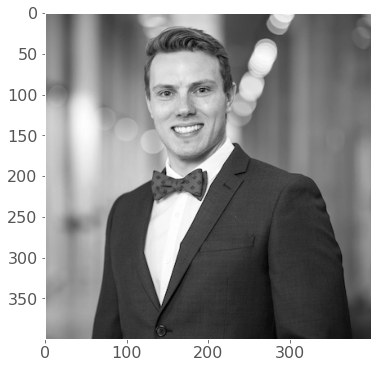

In [42]:
image = plt.imread('img/tomas_beuzen.png')[:,:,0]
plt.imshow(image, cmap='gray')
print(f"Image shape: {image.shape}")
print(f"Max. pixel value: {image.max()}")
print(f"Min. pixel value: {image.min()}")

Notice that `image` is just a numpy array of size `(400, 400)`, with values ranging from -1 to 1.

Your task is to **rotate and flip the image** so that it looks like this:

![](img/tomas_beuzen_flipped.png)

Hints:
- Plot the image using `plt.imshow(<ndarray>, cmap='gray')`, as I've done above.
- Do not overwrite the `image` variable, we will use it in the next few questions.
- NumPy has helpful functions for "flipping" arrays! In Jupyter, you can try typing `np.flip` and then press tab to see what the auto-complete reveals...

Image shape: (400, 400)
Max. pixel value: 1.0
Min. pixel value: 0.0


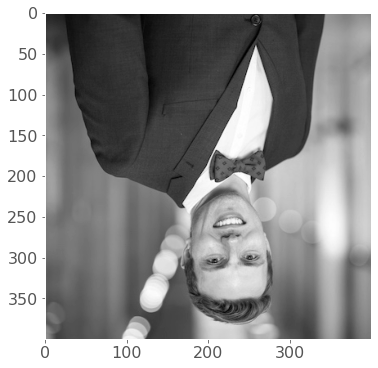

In [50]:
image = plt.imread('img/tomas_beuzen.png')[:,:,0]
flip_image = np.flip(image)
plt.imshow(flip_image, cmap='gray')
print(f"Image shape: {image.shape}")
print(f"Max. pixel value: {image.max()}")
print(f"Min. pixel value: {image.min()}")

### 3.2
rubric={accuracy:2}

I want to prepare this image to post on Instagram and I think a 20 pixel black border will really make my eyes pop. Add a 20 pixel wide border of black pixels to my image so that it looks like this:

![](img/tomas_beuzen_border.png)

Hints:
- The image including the border should remain 400 x 400 pixels (i.e., you are adding the border within the image), **do not** add it to the outside and make the image 440 x 440 pixels.
- Black pixels have a value of `0` (i.e., they have 0 brightness).
- There are many ways to solve this question so do it however you like, but `np.pad()` might be helpful...

Image shape: (400, 400)
Max. pixel value: 1.0
Min. pixel value: 0.0


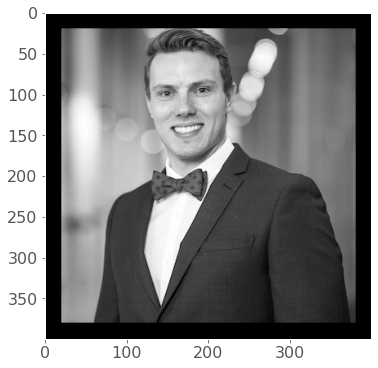

In [60]:
image = plt.imread('img/tomas_beuzen.png')[:,:,0]
border_image = np.pad(image[20:-20,20:-20], ((20,20),(20,20)))
plt.imshow(border_image, cmap='gray')
print(f"Image shape: {image.shape}")
print(f"Max. pixel value: {image.max()}")
print(f"Min. pixel value: {image.min()}")

### (OPTIONAL) 3.3
rubric={accuracy:1}

In DSCI 572 you'll learn about [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN), which are often used when working with image data, e.g., to build image classification models. A common operation in a CNN architecture is [pooling](https://cs231n.github.io/convolutional-networks/#pool), in which you reduce the size of an image by looking at a small window of pixels, say a 4 x 4 window of pixels, and representing that window using e.g., the max/min/mean value of the pixels in the window. Below is an example of mean pooling, transforming a 6 x 6 image into a 3 x 3 image by taking the mean of 2 x 2 pixel windows:

![](https://stanford.edu/~shervine/teaching/cs-230/illustrations/average-pooling-a.png?58f9ab6d61248c3ec8d526ef65763d2f)

Source: [stanford.edu](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

You'll learn more about CNN architecure and operations in DSCI 572, but for some foreshadowing, let's implement pooling in NumPy here. We can do it by reshaping our image into `n x n` windows and then calculating the `.max()` of each window. Your task here is to implement **mean** pooling on the image of me using a `10 x 10` window, the result will look like this:

![](img/tomas_beuzen_mean_pool.png)

Hint:
- There are plenty of ways you could solve this question but I started by reshaping both axes of the image into shape `(40, 10)`, to end up with a 4D array of shape `(40, 10, 40, 10)`.
- Then apply `.mean()` to the reshaped data on both the axes of size 10 (you can specify multiple axes to operate on simultaneously by passing a tuple to the `axes=` argument of `.mean()`)
- See [here](https://stackoverflow.com/a/42463514) for more help.
- Play around with you code to get a feel for what pooling does. What happens if you increase/decrease the pooling window size? Also feel free to try using `.min()` or `.max()` for a more "horror-movie" effect, for example: 

![](img/tomas_beuzen_min_pool.png)

In [ ]:
# Your answer goes here.

### (OPTIONAL) 3.4
rubric={accuracy:1}

As the name suggests, another common operation in CNNs is convolution. A convolutional layer applies so called "filters" to an image. This is kind of like the pooling we saw in the previous question, but instead of representing a window of pixels by some summary statistic, a filter is a window of "weights", which is passed over an image and used to create "new pixels" by multiplying the original pixels by weights and summing them all together. The idea in CNN's is that these filters can be used to extract useful information from the data; for example, they might highlight the edges in an image, or colour boundaries, which could help a machine learning model classify what that image contains.  

In the example below, a 3 x 3 filter with weights of 0's, 1's, 2's and 3's is being passed over an image. [Here is a fun interactive exploration](https://setosa.io/ev/image-kernels/) of convolutional filters if you want to learn more, but you'll learn about CNN's in DSCI 572 so don't worry too much about them here.

![](http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif)

Source: [deeplearning.net](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html#refresher-discrete-convolutions)

Your task here is to implement a convolutional layer in NumPy. Apply the filter `f` I've defined in the code below to my image. The result will look like this:

![](img/tomas_beuzen_emboss.png)

You should pad the image with 0's so that you can apply the filter to the edges and corners, like this:

![](http://deeplearning.net/software/theano/_images/numerical_padding_strides.gif)

Source: [deeplearning.net](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html#refresher-discrete-convolutions)

There are many ways to solve this problem, but my solution involved leverage strides, here's a hint to get you started: https://jessicastringham.net/2017/12/31/stride-tricks/, and see [here](https://stackoverflow.com/questions/53097952/how-to-understand-numpy-strides-for-layman) for more information in "strides" in NumPy.

In [ ]:
f = np.array([[-2, -1, 0],
              [-1, 1, 1],
              [0, 1, 2]])  # filter to apply
# Your answer goes here.

## Exercise 4: Reading Data with Pandas 
<hr>

rubric={autograde:5}

Reading data from external sources will be one of the most common things you do in Pandas, so it's good to get some practice doing this. We will use Pandas to read in variants of the Palmer penguins data set that you've already seen in DSCI 523. In this data set there are measures on the three species of penguins shown in this illustration below. You can learn more about the penguins and this data set [here](https://allisonhorst.github.io/palmerpenguins/).

![](img/penguins.png)

Source: [allisonhorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/master/man/figures/lter_penguins.png?raw=true)

In the data directory of this repository there are 5 different versions of the same data set in different file formats. Your task is to read each of these into a Pandas dataframe. A test has been provided to make sure you've correctly read each file in.

Hint: you can compare which rows of two dataframes are not equal using something like `penguins_csv[~penguins_csv.eq(penguins_tsv).any(axis=1)]`.

In [157]:
# read in file named penguins.csv
penguins_csv = None
penguins_csv = pd.read_csv('data/penguins.csv')
# read in file named penguins.tsv
penguins_tsv = None
penguins_tsv = pd.read_csv('data/penguins.tsv', delimiter= '\s+')
# read in file named penguins-meta-data.csv
penguins_meta_data = None
penguins_meta_data = pd.read_csv('data/penguins-meta-data.csv', skiprows =  9, nrows = 344, names = ["species",
                                                                                                       "island",
                                                                                                       "bill_length_mm",
                                                                                                       "bill_depth_mm",
                                                                                                       "flipper_length_mm",
                                                                                                       "body_mass_g",
                                                                                                       "sex",
                                                                                                       "year"])
# read in file named penguins2.csv
penguins2 = None
penguins2 = pd.read_csv('data/penguins2.csv', sep = ';', decimal = ',', header = None, names = ["species",
                                                                                                "island",
                                                                                                "bill_length_mm",
                                                                                                "bill_depth_mm",
                                                                                                "flipper_length_mm",
                                                                                                "body_mass_g",
                                                                                                "sex",
                                                                                                "year"]) 
# read in file named penguins.xlsx
penguins_excel = None
penguins_excel = pd.read_excel('data/penguins.xls', sheet_name = 'penguins')
# Your answer goes here.
print(penguins_csv)
print(penguins2)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
# Autograding
lab3_tests.ex4([penguins_csv, penguins_tsv, penguins_meta_data, penguins2, penguins_excel])

## Exercise 5: Treasure Hunt with Pandas
<hr>

>**I will demonstrate solutions to some of these exercises in lab class and post the video to [Canvas](https://canvas.ubc.ca/courses/53659/external_tools/187).**

Learning how to index with Pandas is kind of like having to eat your vegetables: it's not the funnest thing, but you need to know it! In this exercise, I'll provide you with clues that you need to use to index a dataframe and find the "Treasure". For example, if the clue is "The first ten rows" then you might try:

```python
df.iloc[:10]
'TREASURE'
```

The above is just an example, but the result of your indexing should always be the string `'TREASURE'`.

### 5.1
rubric={autograde:1}

Load in the file `treasure_hunt.csv` as a dataframe called `df`. Read in the first column as the dataframe index column and the first row as the dataframe columns.

In [80]:
treasure_df = None
treasure_df = pd.read_csv('data/treasure_hunt.csv', index_col = 0)

In [81]:
# Autograding
lab3_tests.ex5_1(treasure_df)

PASSED: type(treasure_df) == pd.DataFrame
PASSED: ''.join(treasure_df.columns.values) == 'C1C2C3C4C5C6C7C8C9C10C11C12C13C14C15C16C17C18C19C20C21C22C23C24C25C26C27C28C29C30'
PASSED: ''.join(treasure_df.index.values) == 'R1R2R3R4R5R6R7R8R9R10R11R12R13R14R15R16R17R18R19R20R21R22R23R24R25R26R27R28R29R30'

PASSED TESTS



### 5.2
rubric={autograde:1}

**CLUE:** C20, R1

In [84]:
ex5_2 = None
ex5_2 = treasure_df.loc['R1','C20']

In [85]:
# Autograding
lab3_tests.ex5_2(ex5_2)

PASSED: ex5_2 == 'TREASURE'

PASSED TESTS



### 5.3
rubric={autograde:1}

**CLUE:** thirteenth column, thirteenth row (*hint*: recall that indexing starts at 0!)

In [86]:
ex5_3 = None
ex5_3 = treasure_df.iloc[12,12]

In [87]:
# Autograding
lab3_tests.ex5_3(ex5_3)

PASSED: ex5_3 == 'TREASURE'

PASSED TESTS



### 5.4
rubric={autograde:1}

**CLUE:** R28, tenth column

In [98]:
ex5_4 = None
ex5_4 = treasure_df.loc['R28', treasure_df.columns[9]]

In [90]:
# Autograding
lab3_tests.ex5_4(ex5_4)

PASSED: ex5_4 == 'TREASURE'

PASSED TESTS



### 5.5
rubric={autograde:1}

**CLUE:** C26, R19 to R26

**HINT:** You might need to do a bit of extra wrangling to get a result of "TREASURE" here...

In [125]:
ex5_5 = None
ex5_5 = treasure_df.loc['R19':'R26', 'C26'].sum()

In [126]:
# Autograding
lab3_tests.ex5_5(ex5_5)

PASSED: ex5_5 == 'TREASURE'

PASSED TESTS



### 5.6
rubric={autograde:1}

**CLUE:** The first rows of C29 *plus* the first row of C30

In [119]:
ex5_6 = None
ex5_6 = treasure_df.loc['R1', 'C29':'C30'].sum()

In [120]:
# Autograding
lab3_tests.ex5_6(ex5_6)

PASSED: ex5_6 == 'TREASURE'

PASSED TESTS



### 5.7
rubric={autograde:1}

**CLUE:** The first row of all columns that **do not** have a "Z" in the last row.

**HINT:** You might need to do a bit of extra wrangling to get a result of "TREASURE" here...

In [134]:
ex5_7 = None
#treasure_df[treasure_df.loc['R30'] != 'Z']
#treasure_df.loc['R30']

<ipython-input-134-89d222593c5e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  treasure_df[treasure_df.loc['R30'] != 'Z']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# Autograding
lab3_tests.ex5_7(ex5_7)

### 5.8
rubric={autograde:1}

**CLUE:** C1 for C1 < C2 (remember, in Python, comparison operators work on string too, e.g., `"a" < "b" = True` because `a` occurs before `b` alphabetically. Also, don't forget about `.query()`!)

**HINT:** You might need to do a bit of extra wrangling to get a result of "TREASURE" here...

In [145]:
ex5_8 = None
ex5_8 = treasure_df.query("C1 < C2").sum()[0]

In [146]:
# Autograding
lab3_tests.ex5_8(ex5_8)

PASSED: ex5_8 == 'TREASURE'

PASSED TESTS



## Exercise 6: Mind the Gap
<hr>

In this exercise, we'll practice some basic Pandas operations on the [Gapminder dataset](https://www.gapminder.org/about-gapminder/) which you are already familiar with from your DSCI 523 labs. Gapminder is an educational foundation that aims to use data to unbiasedly describe trends in health and socioeconomics; it is a great source of geographical, socioeconomic, and health data - a subset of which we'll be exploring here. In particular, we'll be exploring a dataframe of the following features in this exercise:

|     | country     | continent | year | lifeExp | pop      | gdpPercap  |
|:---:|:-----------:|:---------:|:----:|:-------:|:--------:|:----------:|
|  0  | Afghanistan | Asia      | 1952 | 28.801  | 8425333  | 779.445314 |
|  1  | Afghanistan | Asia      | 1957 | 30.332  | 9240934  | 820.853030 |
|  2  | Afghanistan | Asia      | 1962 | 31.997  | 10267083 | 853.100710 |
|  3  | Afghanistan | Asia      | 1967 | 34.020  | 11537966 | 836.197138 |
|  4  | Afghanistan | Asia      | 1972 | 36.088  | 13079460 | 739.981106 |
| ... |     ...     |    ...    | ...  |   ...   |   ...    |    ...     |

### 6.1
rubric={accuracy:1}

Read the gapminder dataset into a dataframe called `df` from this url: <https://raw.githubusercontent.com/jstaf/gapminder/master/gapminder/gapminder.csv>

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/jstaf/gapminder/master/gapminder/gapminder.csv')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### 6.2
rubric={accuracy:1}

Which continent has the most observations in the gapminder dataset? You can leave your answer as the output of a dataframe operation (*hint*: `.value_counts()`).

In [149]:
df.value_count('continent')

AttributeError: 'DataFrame' object has no attribute 'value_count'

### 6.3
rubric={accuracy:2}

What are the minimum and maximum life expectancies in the dataset, and what are the corresponding countries and the years? (*hint*: `.argmin()`/`.argmax()`)

In [ ]:
# Your answer goes here.

### 6.4
rubric={accuracy:2}

How much larger is the total population in this dataset in 2007 compared to 1952? You can give you answer as a float, e.g., "the population is 1.8 times larger in 2007 than in 1952." (*hint*: I would use `.query()` to subset the dataframe for 1952 and then calculate the `.sum()` of the population, then repeat for 2007).

In [ ]:
# Your answer goes here.

### 6.5
rubric={accuracy:2}

What is the mean life expectancy of countries with the highest 50% of `gdpPercap` and countries with the lowest 50% of `gdpPercap`? (*hint*: try combining `.query()` and `.median()`)

In [ ]:
# Your answer goes here.

## Submission to Canvas

**PLEASE READ:** When you are ready to submit your assignment do the following:
1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to `.html` format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Run the code `submit()` below to go through an interactive submission process to Canvas.
4. After submission, be sure to do a final push of all your work to GitHub (including the rendered html file).

In [ ]:
# convert_notebook("lab3.ipynb", "html")  # uncomment and run when you want to try convert your notebook (or you can convert manually from the File menu)

In [ ]:
# submit(course_code=53659, token=False)  # uncomment and run when ready to submit to Canvas

![](img/super.png)